## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [210]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [370]:
#Read in the dataset
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [212]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [213]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [218]:
convert_df = df.query('converted==1')['user_id'].nunique()
convert_prop = convert_df/df.shape[0]
convert_prop


0.1194418598333322

e. The number of times the `new_page` and `treatment` don't line up.

In [221]:
df.query('(group == "treatment" and landing_page != "new_page") or (group != "treatment" and landing_page == "new_page")')['user_id'].count()


3893

f. Do any of the rows have missing values?

In [222]:
#check for missing values
df.isnull().values.any()

False

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [223]:
#create new dataset that meets the specifications
df2 = df.drop(df.query('(group == "treatment" and landing_page != "new_page") or (group != "treatment" and landing_page == "new_page") or (group == "control" and landing_page != "old_page") or (group != "control" and landing_page == "old_page")').index)

df2.shape[0]

290585

In [224]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [225]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [226]:
#Find the user_id repeated in df2
df2[df2.duplicated(['user_id'], keep=False)]['user_id']

1899    773192
2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [227]:
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [229]:
df2 = df2.drop(df2[(df2.user_id == 773192) & (df2['timestamp'] == '2017-01-09 05:37:58.781806')].index)
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [232]:
converted_users2 = float(df2.query('converted == 1')['user_id'].nunique())
p2 = converted_users2/float(df2.shape[0])
print("The probability of an individual converting regardless of the page they receive is {0:.4}".format(p2))


The probability of an individual converting regardless of the page they receive is 0.1196


In [231]:
converted_users = df2.converted.mean()
print("The probability of an individual converting regardless of the page they receive is {0:.4}".format(converted_users))

The probability of an individual converting regardless of the page they receive is 0.1196


b. Given that an individual was in the `control` group, what is the probability they converted?

In [233]:
converted_control = df2.query('group == "control"')['converted'].mean()
print("Given that an individual was in the control group, the probability they converted is{0: .4} ".format(converted_control))

Given that an individual was in the control group, the probability they converted is 0.1204 


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [234]:
converted_treatment = df2.query('group == "treatment"')['converted'].mean()
print("Given that an individual was in the control group, the probability they converted is{0: .4} ".format(converted_treatment))

Given that an individual was in the control group, the probability they converted is 0.1188 


d. What is the probability that an individual received the new page?

In [235]:
recv_npage = (df2.landing_page == 'new_page').mean()
print("The probability that an individual received the new page is {0: .4} ".format(recv_npage))

The probability that an individual received the new page is  0.5001 


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**I do not think that the results above are enough evidence to conclude that the new page leads to more conversions.  Because, the results above doesn't allow us to check the whole population to make a decision, since the users converted for both groups are very similar to each other. **

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H0:Pold−Pnew ≥ 0$$ (Conversion rate of user population given the new page is the same as those given the old page or the difference between them is equal to zero.)  

$$H1:Pold−Pnew < 0 $$ (Conversion rate of the new page is greater than the old page or the difference between the conversion rate of the two pages is greater than zero)

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [236]:
#Regardless of the page, compute the converted success rate
p_new = (df2.query('converted == 1')['user_id'].nunique())/(df2.user_id.nunique())
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [237]:
#Regardless of the page, compute the converted success rate
p_old = (df2.query('converted == 1')['user_id'].nunique())/(df2.user_id.nunique())
p_old

0.11959708724499628

In [372]:
#Find the difference between the convert rate of the two pages 
p_new - p_old 

0.0

c. What is $n_{new}$?

In [238]:
#Compute the number of rows containing users with new page
n_new = df2[df2['group']=='treatment'].shape[0]
n_new

145310

d. What is $n_{old}$?

In [240]:
#Compute the number of rows containing users with old page
n_old = df2.query('landing_page == "old_page"')['user_id'].shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [260]:
#Simulate  nnew  transactions with a convert rate of  pnewpnew  under the null
new_page_converted = np.random.binomial(1, p_new, n_new)
new_page_converted

array([0, 0, 1, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [262]:
#Simulate  nold transactions with a convert rate of  pnewpnew  under the null
old_page_converted = np.random.binomial(1, p_old, n_old)
old_page_converted

array([0, 0, 0, ..., 0, 0, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [263]:
new_page_converted.mean() - old_page_converted.mean()

-0.0011513057615316069

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [291]:
#use bootstrapping to create sampling distribution completion rate difference
p_diffs = []
size = df.shape[0]
for _ in range(10000):
    sample = df2.sample(size, replace=True)
    new_page_converted = np.random.binomial(1, p_new, n_new)
    old_page_converted = np.random.binomial(1, p_old, n_old)
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

***The simulation below shows that the data creates a normal distribution and under the null hypothesis, this is what is supposed to look like.***

In [292]:
#create array
p_diffs = np.array(p_diffs)

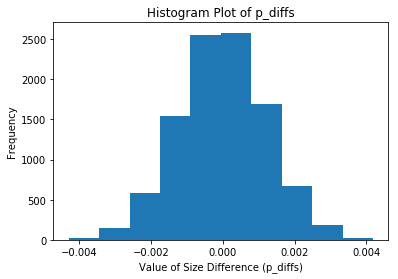

In [293]:
#plot histogram
plt.hist(p_diffs);
plt.xlabel('Value of Size Difference (p_diffs)');
plt.ylabel('Frequency');
plt.title('Histogram Plot of p_diffs');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [315]:
# get the number of converted users for new page
new_num_users = len(df2[(df2.landing_page=='new_page') & (df2.converted ==1)])

# get the number of converted users for old page
old_num_users = len(df2[(df2.landing_page =='old_page') & (df2.converted == 1)])

#find the converted rate for both pages
new_rate = new_num_users/n_new
old_rate = old_num_users/n_old
#compute observed difference
obs_diff = float(new_rate - old_rate)
obs_diff

-0.0015782389853555567

In [308]:
#create distribution under the null hypothesis
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)
null_vals

array([ 0.00133802,  0.00011085, -0.00215759, ..., -0.00102103,
       -0.00202693, -0.0004061 ])

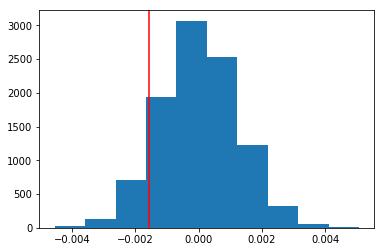

In [309]:
#plot Null distribution and vertical line for observed distribution
plt.hist(null_vals);
plt.axvline(x=obs_diff, color='red')

In [310]:
# compute p value
(null_vals > obs_diff).mean()

0.90400000000000003

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**The value calculated is known as the p-value. The p-value is defined as the the probability of observing our statistic or a more extreme statistic from the null hypothesis.**

***Since the p-value is greater than the critical value (the treshold value of Type I error), we have failed to reject the null. In other words, we are failing to reject the null (accept the alternative).  Because having a type I error rate of 0.05, the old page has higher probability of convert rate than the new page. ***

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [311]:
import statsmodels.api as sm
#calculate number of conversions
convert_old = len(df2[(df2['landing_page']=='old_page')&(df2['converted']==1)])
convert_new = len(df2[(df2['landing_page']=='new_page')&(df2['converted']==1)])
n_old = len(df2.query('group == "control"'))
n_new = len(df2.query('group == "treatment"'))

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [376]:
#z_score, p_value = sm.stats.proportions_ztest(np.array([convert_new, convert_old]), np.array([n_new, n_old]), alternative='larger')
z_score, p_value = sm.stats.proportions_ztest(np.array([convert_new,convert_old]),np.array([n_new,n_old]), alternative = 'larger')
print(z_score, p_value)

-1.31092419842 0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**z_score is the number of standard number of deviations from the mean a data point is.**

***The z-score above (-1.31092419842) does not exceed the critical value (0.905058312759), we fail to reject the null hypothesis. 
Thus, the converted rate for new page and old page has no difference; which agrees with the findings in parts j and k. ***

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression** 

***Because, Logistic regression unlike multiple regression is used to predict a categorical response with only two outcomes (that is given as 1's and 0's) and predictor variables that are continuous.***

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [321]:
#create an intercept and a dummy variable column for which page each user received
df2['intercept']=1
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [323]:
#Set up logistic regression 
logreg = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [325]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

result = logreg.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 17 Mar 2018   Pseudo R-squ.:               8.077e-06
Time:                        13:32:11   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The p-value from the regression summary above with ab_page is 0.190, which is slightly higher than the p-value obtained from the z-test. The null assumes that there is no difference between the treatment and control group.  While, the alternative is that there is a difference between the two groups and that new_page is better.  Results from Part II assume that the old page is better than the new page, which was given by the fact that we failed to reject the null;since the p-value was higher.  Once again, the p-value although different from the one calculated with the z-test, is still too high to reject the null.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answers: **

--> ***Since, in doing our regression analysis only one feature was considered to determine if a user would convert or not, I     believe it will support our model and hence our conclusion if we add a couple more features.***  

--> ***Timestamp is one of the variables that is worth considering, since the variation in time (i.e., time of the day or day of the week) in which the browsing took place, can add more specificity to our decision making. Another factor is type of student that is if wether the student is new or existing/returning.  This category is likely to allow us account for one of the most common limitations of such analysis, known as change aversion.*** 

--> ***It becomes disadvantageous to add multiple features, especially when we fail to use the ones that have more impact and add all those factors that are the least influential.  Moreover, using more features will introduce complexity into our model.  As a result of which, we will have to make other additional statistical considerations (I would appreciate if the reviewer can explain what some of these complexities might be, my response is only based on assumption).  ***
***It is also possible despite all the number of features considered, we might still fail to account for the most statistically and practically significant factors. ***



g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [328]:
#read into a new dataset
countries_df = pd.read_csv('./countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [329]:
#Merge the new dataset with the datasets used so far
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [334]:
df_new.country.unique()
### Create the necessary dummy variables
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])

#Create intercept variable
df_new['intercept'] = 1

df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [336]:
### Fit Your Linear Model And Obtain the Results
logreg_countries = sm.Logit(df_new['converted'], df_new[['UK', 'US', 'intercept']])

#Fit and show the results
results = logreg_countries.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sat, 17 Mar 2018   Pseudo R-squ.:               1.521e-05
Time:                        14:44:23   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
US             0.0408      0.027      1.518      0.129      -0.012       0.093
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
==============================================================================
"""

In [337]:
#find conversion rate per group
df_new.groupby('group')['converted'].mean()

group
control      0.120386
treatment    0.118808
Name: converted, dtype: float64

In [338]:
#find conversion rate per country
df_new.groupby('country')['converted'].mean()

country
CA    0.115318
UK    0.120594
US    0.119547
Name: converted, dtype: float64

In [342]:
#take the exponential of each of the coefficients to determine how 1 unit increase or decrease by country affects the odds of being converted
print(np.exp(results.params))

UK           1.052027
US           1.041647
intercept    0.130350
dtype: float64


***The following section looks at interaction between page and country***

In [380]:
#clone the joined data used above 
df_interaction = df_new

In [387]:
#Create interaction between ab_page and country UK and US
#df_interaction['US_ab_page'] = df_interaction['ab_page'] * df_interaction['US']
#df_interaction['UK_ab_page'] = df_interaction['ab_page'] * df_interaction['UK']

In [390]:
#Create logistic regression for the interaction between ab_page and country
interaction = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page','US', 'UK']])
result_interact = interaction.fit()
result_interact.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 19 Mar 2018   Pseudo R-squ.:               2.323e-05
Time:                        17:25:23   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
US             0.0408      0.027      1.516      0.130      -0.012       0.093
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
==============================================================================
"""

In [391]:
#Exponentiate to interpret
np.exp(result_interact.params)

intercept    0.131332
ab_page      0.985168
US           1.041599
UK           1.051944
dtype: float64

**Interpretation** 

As shown in the above Logit Regression Result, the coefficient of interaction variable for US and UK differ from that of ab_page and ab_page has a much smaller coefficient value than for the two countries. 

The smallest p-value is that of the intercept's, which is less than the threshold value (0.05) and that is statistically significant. 

Having done the logistic regression for the interaction , the result isn't different from the previous regression result.  Both the p-value and the z-score haven't shown any significant increase or decrease.  Thus, there is still not enough enough evidence to reject the null hypothesis, as country hasn't impacted regression results. 

***Conclusions based on Regression Analysis*** 
- According to the odd ratio by country, for every unit increase for UK and US holding other variables constant, they are at a conversion likelihood of 1.05 and 1.04 respectively. The values show that the odds for both countries is above 1 and almost the same to each other. The fact that they are the same suggests that the likelihood of converting is indpendent of country. 

- The conversion rate between the two groups still don't have significant difference.  Thus, its similarity with the previous regression model and the z-test; that is we fail to reject the null and so we should keep the old page. 

## Resources 
In order to complete this project, the following resources have been used: 
All the quizzes from the Descriptive Statistics lessons

Help from student Advocates on Slack

Used stack overflow

http://blog.yhat.com/posts/logistic-regression-and-python.html 

https://www.youtube.com/watch?v=uI_m_htIv_c 

https://stackoverflow.com/questions/27644617/difference-between-n-and-size-parameters-in-np-random-binomialn-p-size-1000

http://www.juanshishido.com/logisticcoefficients.html

https://www.packtpub.com/mapt/book/big_data_and_business_intelligence/9781784390150/2/ch02lvl1sec16/one-tailed-and-two-tailed-tests

<a id='conclusions'></a>
## Conclusions

***In conclusion, from the two different tests carried out, it was found that the old page performs better than the new page. Thus,we accept the Null hypothesis and reject the Alternative hypothesis. Using logistic regression it was also found that countries is not a significanlty influential feature in the dataset to base our decision/recommendation on the launch of the new page by the e-commerce company. It maybe worth doing another regression modelling using timestamp as the third feature.  If the outcome is similar to those above, then the company should abandon the idea of launching the new page and stick to the old one. And then maybe consider running tests on features on the old page that can be improved or enhanced to increase number of users.***   

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.